In [317]:
#импортируем
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

In [318]:
df = pd.read_excel('/content/drive/MyDrive/int/train.xlsx')

In [359]:
print("Head")
print(df.head(13))
print("Информация")
print(df.shape)
print(df.info())

Head
            Цена на арматуру  value_diff
dt                                      
2015-01-05             32900         NaN
2015-01-12             32500      -400.0
2015-01-19             32000      -500.0
2015-01-26             30700     -1300.0
2015-02-02             30300      -400.0
2015-02-09             30300         0.0
2015-02-16             30100      -200.0
2015-02-23             29400      -700.0
2015-03-02             29200      -200.0
2015-03-09             29000      -200.0
2015-03-16             28700      -300.0
2015-03-23             27800      -900.0
2015-03-30             27200      -600.0
Информация
(400, 2)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2015-01-05 to 2022-08-29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Цена на арматуру  400 non-null    int64  
 1   value_diff        399 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.4 KB

In [320]:
#Удаление дубликатов и сортировка по времени
df.drop_duplicates(inplace=True)
df.sort_values(by='dt', inplace=True)

In [321]:
#
df.set_index('dt', inplace=True)

In [322]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Цена на арматуру'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155


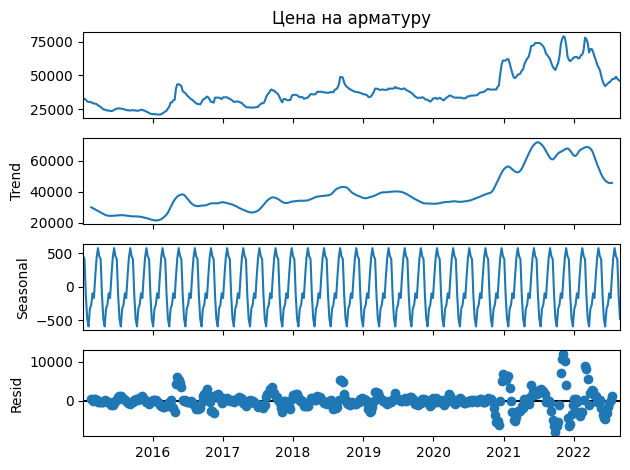

In [323]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Цена на арматуру'], period=12)  # period зависит от данных
decompose.plot()
plt.show()

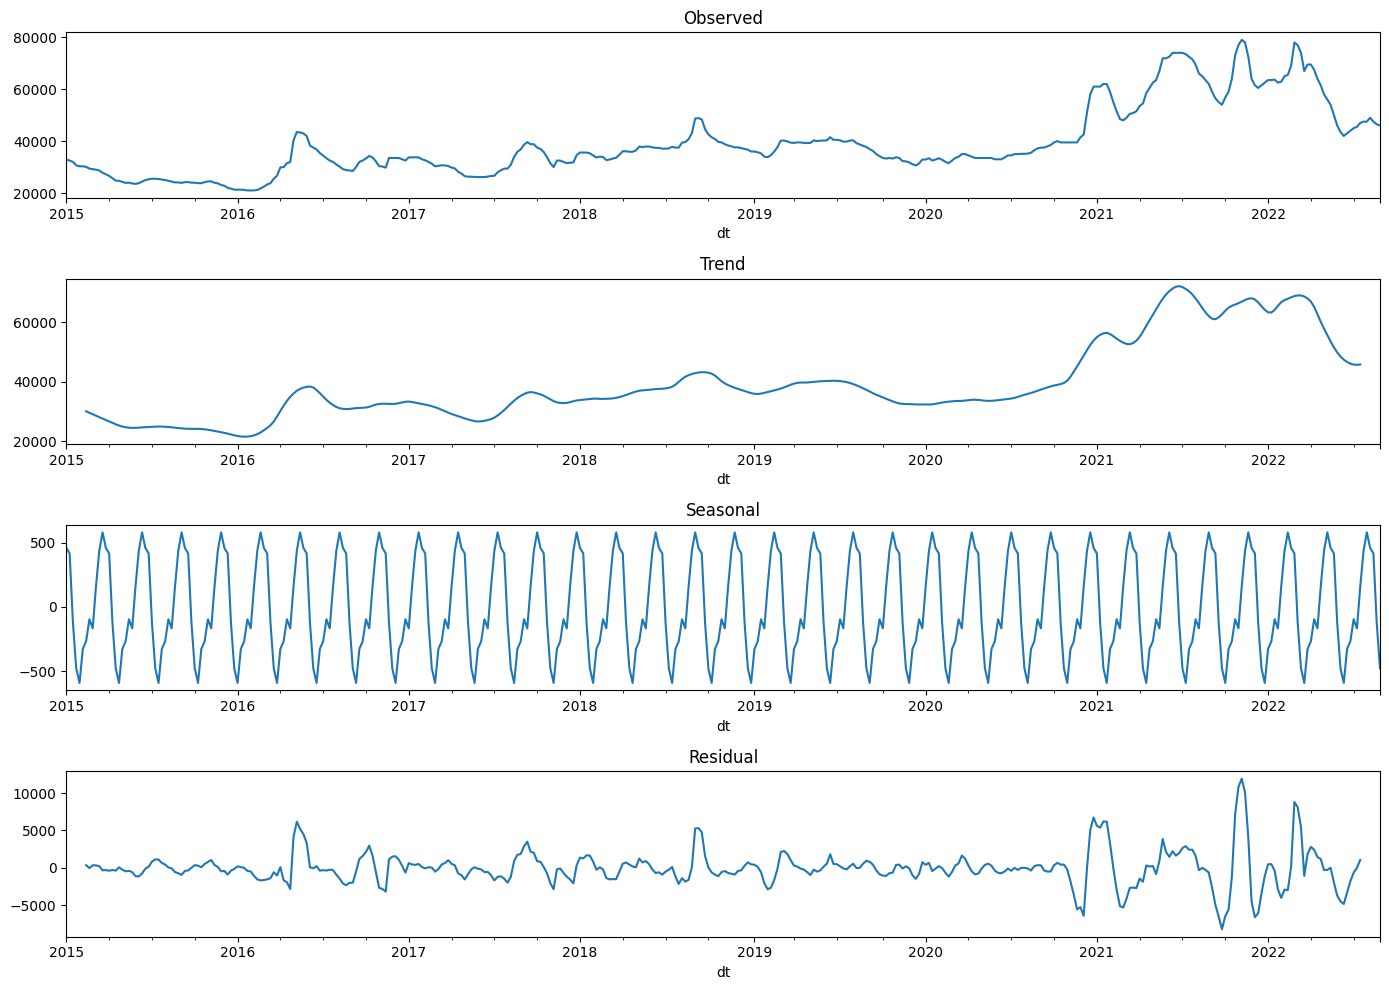

In [324]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Декомпозиция временного ряда
decompose = seasonal_decompose(df['Цена на арматуру'], period=12)  #  зависит от данных

# Создаем фигуру и оси с увеличенным размером
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 10))  # Размер фигуры (ширина, высота)

# Построение графиков на соответствующих осях
decompose.observed.plot(ax=axes[0], title='Observed')
decompose.trend.plot(ax=axes[1], title='Trend')
decompose.seasonal.plot(ax=axes[2], title='Seasonal')
decompose.resid.plot(ax=axes[3], title='Residual')

# Настройка отступов между графиками
plt.tight_layout()

# Отображение графиков
plt.show()

<Figure size 1000x600 with 0 Axes>

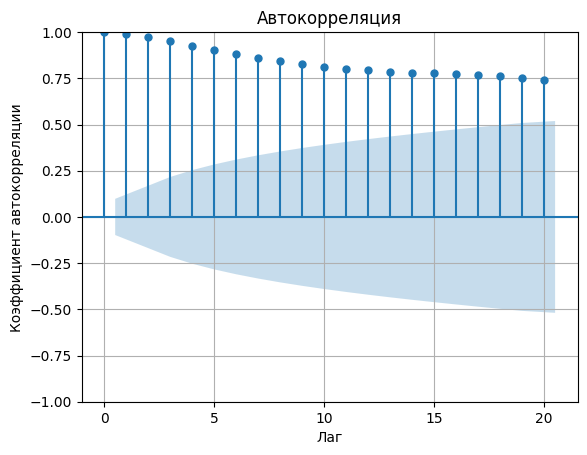

In [325]:
# Построение графика автокорреляции
plt.figure(figsize=(10, 6))
plot_acf(df, lags=20)  # lags — количество лагов для анализа
plt.title('Автокорреляция')
plt.xlabel('Лаг')
plt.ylabel('Коэффициент автокорреляции')
plt.grid(True)
plt.show()

In [336]:
# Функция для выполнения теста ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("Ряд стационарен (p-value < 0.05)")
    else:
        print("Ряд нестационарен (p-value >= 0.05)")
# Проверим на стационарность исходный ряд
adf_test(df['Цена на арматуру'])


ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
Ряд нестационарен (p-value >= 0.05)


In [337]:
# Применение первого порядка дифференцирования
df['value_diff'] = df['Цена на арматуру'].diff().dropna()

# Проверка на стационарность
adf_test(df['value_diff'].dropna())


ADF Statistic: -7.706061504115209
p-value: 1.300693837380985e-11
Critical Values: {'1%': -3.447405233596701, '5%': -2.8690569369014605, '10%': -2.5707743450830893}
Ряд стационарен (p-value < 0.05)


In [338]:
pip install pmdarima


In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error


In [362]:
# Проверяем, есть ли NaN значения в тренировочных данных
print(f"Количество NaN в тренировочных данных: {train.isna().sum()}")

# Если NaN значения есть, удаляем их
train_clean = train.dropna()

# Проверяем снова, что NaN значения удалены
print(f"Количество NaN после удаления: {train_clean.isna().sum()}")


Количество NaN в тренировочных данных: 1
Количество NaN после удаления: 0


In [363]:
# Разделим данные на тренировочные и тестовые выборки (80%/20%)
train_size = int(len(df) * 0.8)
train, test = df['value_diff'][:train_size], df['value_diff'][train_size:]

# Применим auto_arima для подбора модели ARIMA
model = auto_arima(train_clean, seasonal=False, stepwise=True, trace=True)

# Выводим информацию о лучшей модели
print(f"Лучшие параметры ARIMA: {model.order}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5362.117, Time=4.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5466.568, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5364.203, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5392.988, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5365.048, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5363.243, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5359.107, Time=2.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5362.501, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=5366.472, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=5360.118, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5364.089, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5364.286, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=5358.668, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=5360.614, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=5362.510, Time=1.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=5360.663, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=5360.666, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=5364.292, Time=1.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=5363.374, Time=4.04 sec

Best model:  ARIMA(4,0,3)(0,0,0)[0]          
Total fit time: 19.891 seconds
Лучшие параметры ARIMA: (4, 0, 3)


In [367]:
# Выбираем столбец с данными временного ряда
time_series = df['value_diff']
model = ARIMA(time_series, order=(4, 0, 3))
fitted_model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

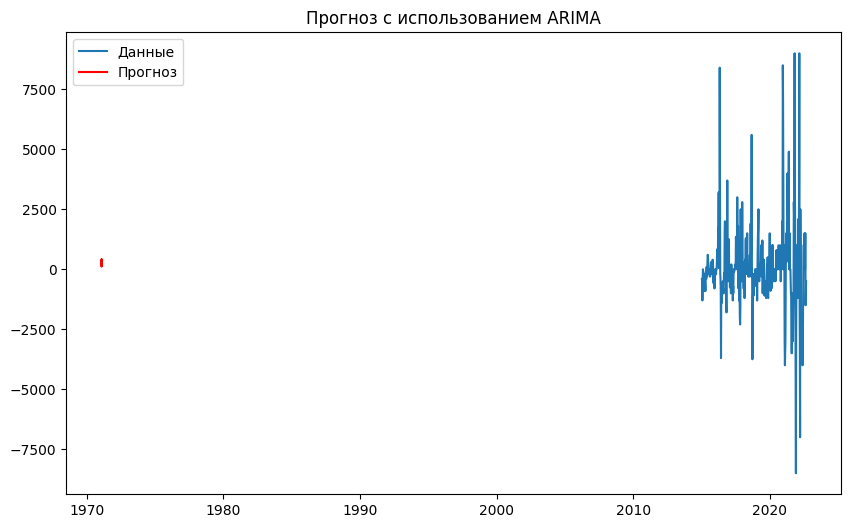

In [372]:
# Прогнозируем следующие 10 значений
forecast = fitted_model.forecast(steps=10)

# График прогноза
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Данные')
plt.plot(np.arange(len(time_series), len(time_series) + 10), forecast, label='Прогноз', color='red')
plt.legend()
plt.title('Прогноз с использованием ARIMA')
plt.show()

In [373]:
# Прогнозируем на тестовых данных
forecast = model.predict(n_periods=len(test))

# Визуализируем результат
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], train, label='Train Data')
plt.plot(df.index[train_size:], test, label='Test Data', color='red')
plt.plot(df.index[train_size:], forecast, label='Forecast', color='green')
plt.legend()
plt.title('Прогноз с ARIMA')
plt.show()

# Оценка точности прогноза (MSE)
mse = mean_squared_error(test, forecast)
print(f"Среднеквадратичная ошибка (MSE): {mse}")


TypeError: Model.predict() missing 1 required positional argument: 'params'

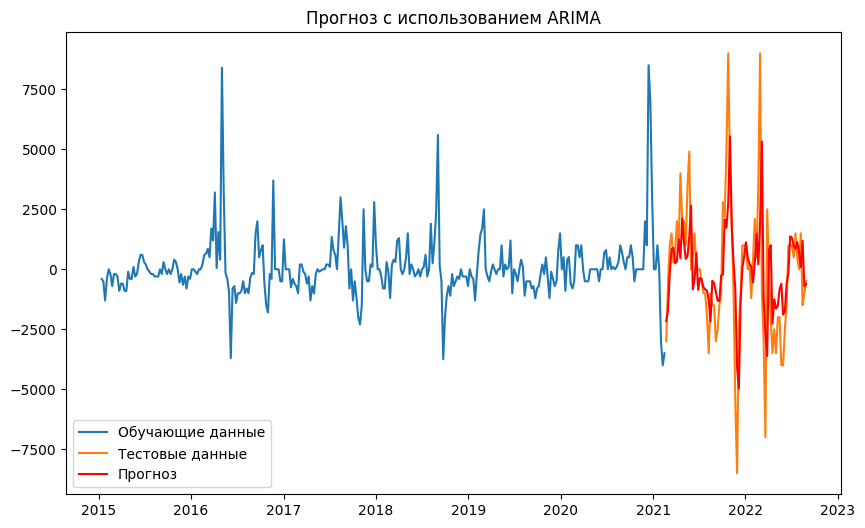

In [374]:
# Прогнозируем на тестовых данных
forecast = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Визуализируем результат
plt.figure(figsize=(10, 6))
plt.plot(train, label='Обучающие данные')
plt.plot(test, label='Тестовые данные')
plt.plot(forecast, label='Прогноз', color='red')
plt.legend()
plt.title('Прогноз с использованием ARIMA')
plt.show()


In [329]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [333]:
# Оценка точности прогноза (MSE)
mse = mean_squared_error(test, forecast)
print(f"Среднеквадратичная ошибка (MSE): {mse}")


Среднеквадратичная ошибка (MSE): 7899442.08816078


In [308]:
# Применяем преобразование Бокса-Кокса
df['boxcox_value'], lambda_ = stats.boxcox(df['Цена на арматуру'])

# Печатаем полученное значение λ (параметр преобразования)
print(f"Оптимальное значение lambda: {lambda_}")

Оптимальное значение lambda: -0.7299608302641509


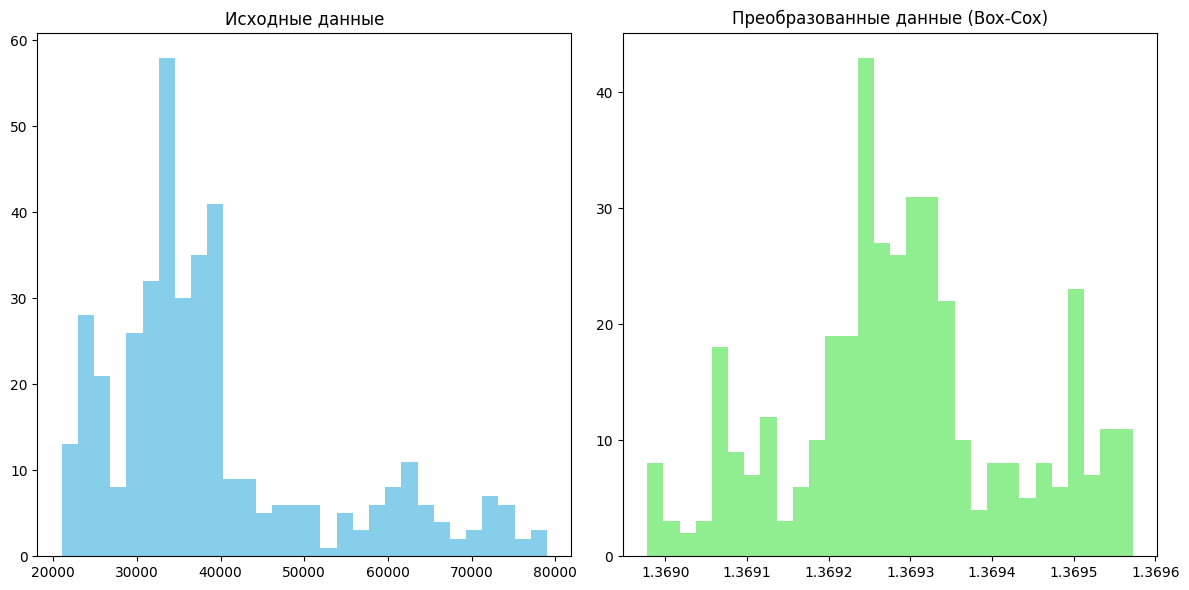

In [309]:
# Визуализируем исходные данные и преобразованные данные
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Цена на арматуру'], bins=30, color='skyblue')
plt.title('Исходные данные')

plt.subplot(1, 2, 2)
plt.hist(df['boxcox_value'], bins=30, color='lightgreen')
plt.title('Преобразованные данные (Box-Cox)')

plt.tight_layout()
plt.show()


In [310]:
from scipy.stats import shapiro

# Тест на нормальность для исходных данных
stat, p_value = shapiro(df['Цена на арматуру'])
print(f"Shapiro test для исходных данных: p-value = {p_value}")

# Тест на нормальность для преобразованных данных
stat, p_value = shapiro(df['boxcox_value'])
print(f"Shapiro test для преобразованных данных: p-value = {p_value}")


Shapiro test для исходных данных: p-value = 9.742475964521447e-18
Shapiro test для преобразованных данных: p-value = 9.927892857447377e-07


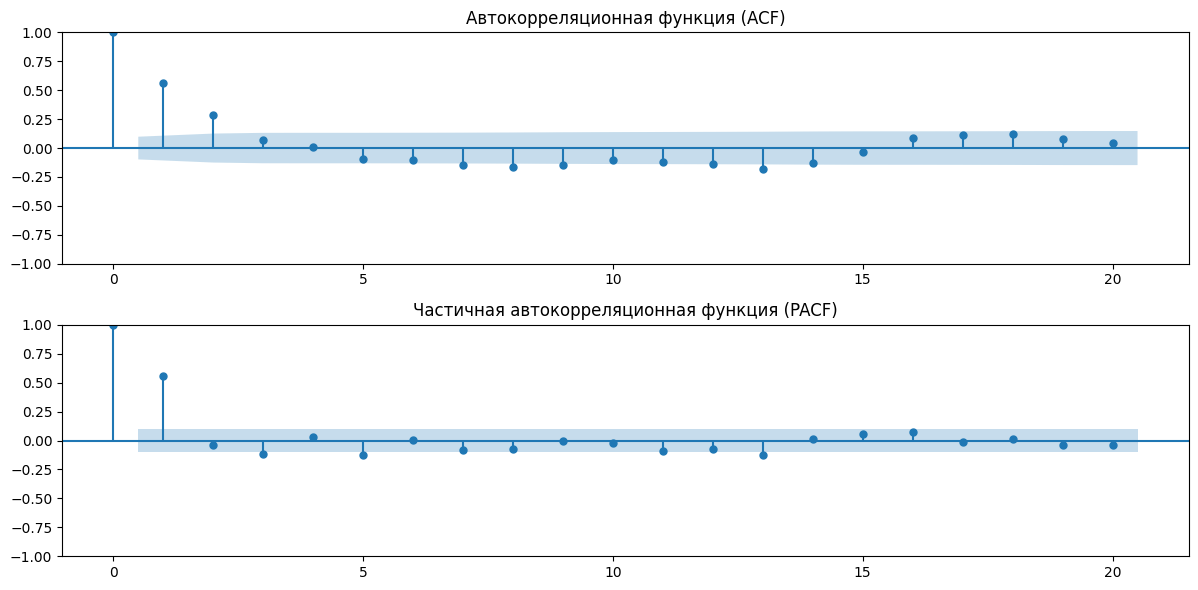

In [ ]:
# Построение графиков ACF и PACF для дифференцированного ряда
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
# Дифференцирование первого порядка
df['value_diff'] = df['Цена на арматуру'].diff()
plot_acf(df['value_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('Автокорреляционная функция (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df['value_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('Частичная автокорреляционная функция (PACF)')
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['value_diff'], inplace=True)

KeyError: "['value_diff'] not found in axis"

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import pandas as pd